# Group A
## Assignment 2

Data Wrangling II 

Create an "Academic performance" dataset of students and perform the following operations using python.
1. Deal with missing values and inconsistencies if any.
2. Deal with outliers if any.
3. Apply data transformations on at least one of the variables.

### Import all the required Python Libraries.

In [ ]:
import pandas as pd
import numpy as np

### Load the Dataset into pandas dataframe. 

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [ ]:
df.shape    #its attribute not function  

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       985 non-null    object 
 1   race/ethnicity               989 non-null    object 
 2   parental level of education  993 non-null    object 
 3   lunch                        999 non-null    object 
 4   test preparation course      990 non-null    object 
 5   math score                   990 non-null    float64
 6   reading score                990 non-null    float64
 7   writing score                990 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe() #statistict info about numrical value

,math score,reading score,writing score
count,990.000000,990.000000,990.000000
mean,66.055556,69.116162,68.082828
std,15.137922,14.594195,15.158456
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


## Data Preprocessing

####  Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [ ]:
df.isnull()  #shows in T, F

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()   # colm -> nullValues

gender                         15
race/ethnicity                 11
parental level of education     7
lunch                           1
test preparation course        10
math score                     10
reading score                  10
writing score                  10
dtype: int64

In [ ]:
df['math score'].fillna(df['math score'].mean())       # filling missing value

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64

In [ ]:
df['math score'].fillna(df['math score'].mean(), inplace=True)  #change permenant 

In [ ]:
df['reading score'].fillna(df['reading score'].median(), inplace=True)      

In [ ]:
df['writing score'].fillna(df['writing score'].std(), inplace=True)

In [ ]:
df.isnull().sum() 

gender                         15
race/ethnicity                 11
parental level of education     7
lunch                           1
test preparation course        10
math score                      0
reading score                   0
writing score                   0
dtype: int64

In [ ]:
df['gender'].value_counts()    # frequency cnt

female    510
male      475
Name: gender, dtype: int64

In [ ]:
df['gender'].fillna('female', inplace=True)    # female is mode(highest frequency) so we replace missing gender with female

In [ ]:
df.isnull().sum() 

gender                          0
race/ethnicity                 11
parental level of education     7
lunch                           1
test preparation course        10
math score                      0
reading score                   0
writing score                   0
dtype: int64

In [ ]:
df['race/ethnicity'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: race/ethnicity, Length: 1000, dtype: bool

In [ ]:
df[df['race/ethnicity'].isnull()]    # return rows where isnull() is null

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
41,female,NaN,associate's degree,standard,none,58.0,73.0,68.0
45,male,NaN,associate's degree,standard,none,65.0,54.0,57.0
56,female,NaN,associate's degree,standard,completed,82.0,85.0,86.0
72,female,NaN,associate's degree,free/reduced,none,41.0,51.0,48.0
89,female,NaN,some high school,standard,none,73.0,86.0,82.0
105,female,NaN,some college,standard,none,58.0,67.0,72.0
128,male,NaN,master's degree,standard,none,82.0,82.0,74.0
129,female,NaN,bachelor's degree,standard,none,51.0,49.0,51.0
148,female,NaN,bachelor's degree,standard,completed,68.0,75.0,81.0
572,female,NaN,NaN,standard,none,53.0,62.0,56.0


In [ ]:
df.iloc[[40,41,42]]    # fencing index

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
40,male,group C,associate's degree,free/reduced,none,55.0,61.0,54.0
41,female,NaN,associate's degree,standard,none,58.0,73.0,68.0
42,female,group B,associate's degree,standard,none,53.0,58.0,65.0


In [ ]:
df['race/ethnicity'].fillna(method='bfill', inplace=True)

In [ ]:
df.iloc[40:43]   # slicing

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
40,male,group C,associate's degree,free/reduced,none,55.0,61.0,54.0
41,female,group B,associate's degree,standard,none,58.0,73.0,68.0
42,female,group B,associate's degree,standard,none,53.0,58.0,65.0


In [ ]:
df.isnull().sum() 

gender                          0
race/ethnicity                  0
parental level of education     7
lunch                           1
test preparation course        10
math score                      0
reading score                   0
writing score                   0
dtype: int64

In [ ]:
df['parental level of education'].fillna(method='pad', inplace=True)

In [ ]:
df['lunch'].fillna(method='ffill', inplace=True)

In [ ]:
df['test preparation course'].fillna(method='backfill', inplace=True)

In [ ]:
df.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

<Axes: >

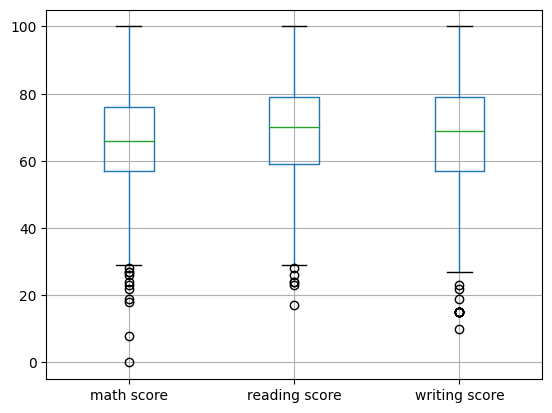

In [ ]:
df.boxplot()

In [ ]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1                   # Formula
upper = Q3 + (IQR*1.5)
lower = Q1 - (IQR*1.5)

In [ ]:
np.clip(df['math score'], lower, upper, inplace=True)
# df['maths score']=np.clip(df['math score'], lower, upper)    # replace value upper to graph with upperWick and lowerWick with lower

<Axes: >

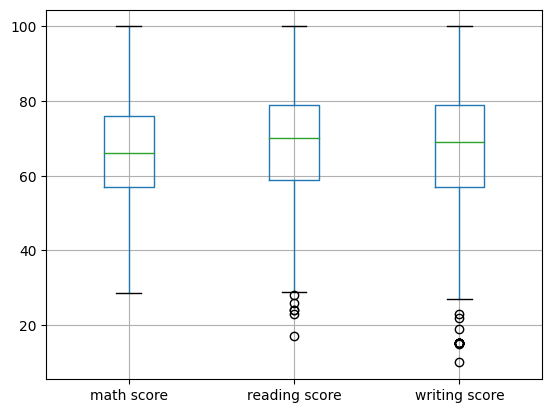

In [ ]:
df.boxplot()

In [ ]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)

IQR = Q3 - Q1                   # Formula
upper = Q3 + (IQR*1.5)
lower = Q1 - (IQR*1.5)
np.clip(df['reading score'], lower, upper, inplace=True)

In [ ]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)

IQR = Q3 - Q1                   # Formula
upper = Q3 + (IQR*1.5)
lower = Q1 - (IQR*1.5)
np.clip(df['writing score'], lower, upper, inplace=True)

<Axes: >

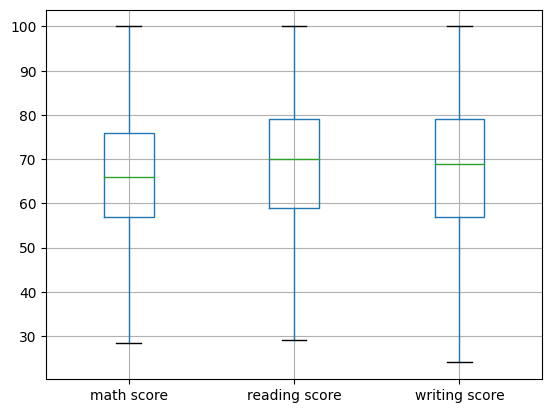

In [ ]:
df.boxplot()

In [ ]:
# def outlier_treatment(col):
#   Q1 = df['col'].quantile(0.25)
#   Q3 = df['col'].quantile(0.75)

#   IQR = Q3 - Q1                   # Formula
#   upper = Q3 + (IQR*1.5)
#   lower = Q1 - (IQR*1.5)

#   df['col_list']=np.clip(df['col'], lower, upper, inplace=True)


#### Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [ ]:
import seaborn as sns

In [ ]:
df['math score']

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64

<Axes: xlabel='math score', ylabel='Density'>

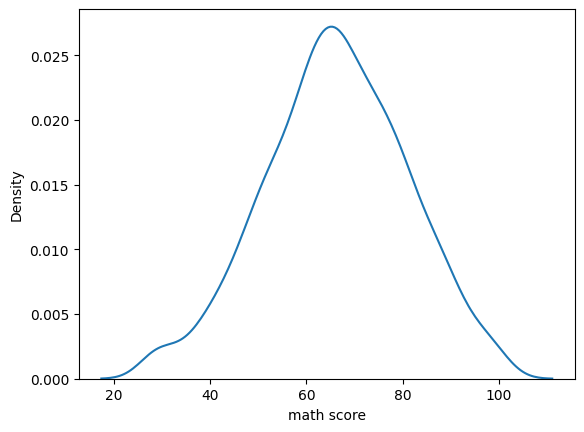

In [ ]:
sns.kdeplot(df['math score'])    

In [ ]:
df['math score'].skew()

-0.14619836669261727

<Axes: xlabel='writing score', ylabel='Density'>

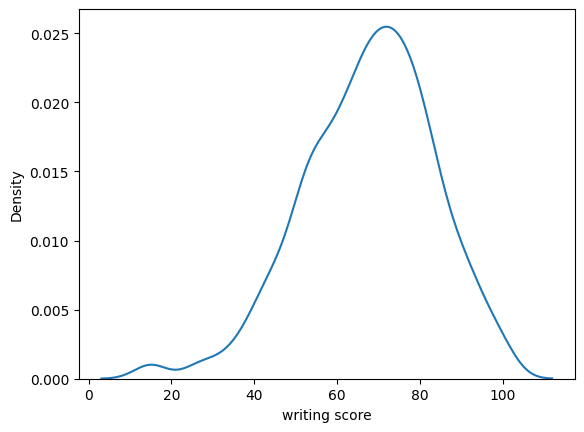

In [ ]:
sns.kdeplot(df['writing score'])

In [ ]:
df['writing score'].skew()

-0.46991355724173667

<Axes: xlabel='reading score', ylabel='Density'>

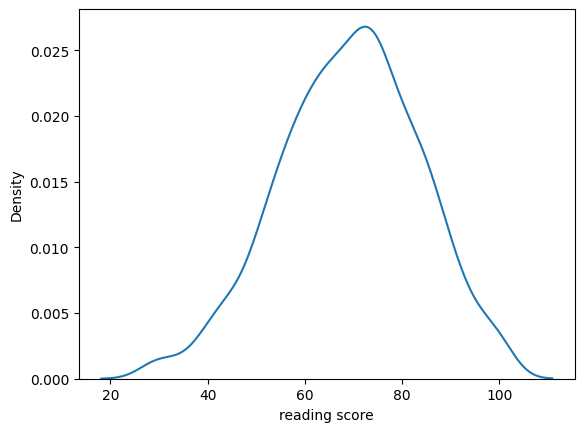

In [ ]:
sns.kdeplot(df['reading score'])

In [ ]:
df['reading score'].skew()

-0.20943942810853586

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
Scaler = StandardScaler()

In [ ]:
Scaler.fit(df[['math score']])

StandardScaler()

In [ ]:
df['math_score_Scaler']=Scaler.transform(df[['math score']])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_Scaler,reading_score_Scaler
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0.396132,0.605634
1,female,group C,some college,standard,completed,69.0,90.0,88.0,0.193600,0.859155
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,1.611329,0.929577
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,-1.291641,0.394366
4,male,group C,some college,standard,none,76.0,78.0,75.0,0.666176,0.690141


In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(df[['reading score']])

MinMaxScaler()

In [ ]:
df['reading_score_Scaler']=Scaler.transform(df[['reading score']])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_Scaler,reading_score_Scaler
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0.396132,0.605634
1,female,group C,some college,standard,completed,69.0,90.0,88.0,0.193600,0.859155
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,1.611329,0.929577
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,-1.291641,0.394366
4,male,group C,some college,standard,none,76.0,78.0,75.0,0.666176,0.690141


In [ ]:
df['math score'].mean()

66.13232323232322

In [ ]:
df['math score'].std()

14.819827696350425